# Machine Learning: Incremental Capstone

https://drive.google.com/drive/folders/1RFvzO7Eyidp4M9GCSO93izHXnaBFfQbF

('FloridaBikeRentals.csv')

Carllos Watts-Nogueira

Due: Jul 12 by 12:59am

# Task 1: Feature engineering

In [1]:
#  Import Libraries - Packages
import pandas as pd
from sklearn.preprocessing import StandardScaler #, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.decomposition import PCA

In [2]:
# Load the data - Inspect Data

# import chardet
# with open('FloridaBikeRentals.csv', 'rb') as f:
#     result = chardet.detect(f.read())
# print(result['encoding'])

In [3]:
# Load the data
df_main = pd.read_csv('FloridaBikeRentals.csv') # after clean Temperature(°C) and Dew point temperature(°C) to Temperature(C) and Dew point temperature(C)

In [4]:
# 1) Analyze the provided dataset and select relevant features
df_main.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01-12-2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01-12-2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01-12-2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01-12-2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01-12-2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

In [6]:
# copy
df = df_main.copy(deep=True)

In [7]:
# Change Date from object type to --> datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Change Hour from int64 to --> int8
df['Hour'] = df['Hour'].astype('int8')

In [8]:
# date + hour df.[DateTime]
df['DateTime'] = df['Date'] + pd.to_timedelta(df['Hour'], unit='h')

In [9]:
# drop date, drop hour
df.drop(['Date', 'Hour'], axis=1, inplace=True)

In [10]:
# Recommended to improve performance/memory usage and efficiency?

# int64 to int32
df['Rented Bike Count'] = df['Rented Bike Count'].astype('int32')
df['Visibility (10m)'] = df['Visibility (10m)'].astype('int32')
df['Humidity(%)'] = df['Humidity(%)'].astype('int32')

# float64 to float32
df['Temperature(C)'] = df['Temperature(C)'].astype('float32')
df['Wind speed (m/s)'] = df['Wind speed (m/s)'].astype('float32')
df['Dew point temperature(C)'] = df['Dew point temperature(C)'].astype('float32')
df['Solar Radiation (MJ/m2)'] = df['Solar Radiation (MJ/m2)'].astype('float32')
df['Rainfall(mm)'] = df['Rainfall(mm)'].astype('float32')
df['Snowfall (cm)'] = df['Snowfall (cm)'].astype('float32')

In [11]:
# memory
before = df_main.memory_usage(deep=True).sum()
after = df.memory_usage(deep=True).sum()
print(f"Memory reduced from {before / 1024:.2f} KB to {after / 1024:.2f} KB")

Memory reduced from 2881.50 KB to 2000.37 KB


In [12]:
df.describe()

,Rented Bike Count,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),DateTime
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760
mean,704.602055,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,2018-06-01 11:30:00
min,0.000000,-17.799999,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,2017-12-01 00:00:00
25%,191.000000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,2018-03-02 05:45:00
50%,504.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,2018-06-01 11:30:00
75%,1065.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,2018-08-31 17:15:00
max,3556.000000,39.400002,98.000000,7.400000,2000.000000,27.200001,3.520000,35.000000,8.800000,2018-11-30 23:00:00
std,644.997468,11.944813,20.362413,1.036305,608.298712,13.060333,0.868734,1.128226,0.436725,NaN


In [13]:
df.duplicated().sum() #= 0

np.int64(0)

In [14]:
# handle missing values
df.isnull().sum()   #= 0

,0
Rented Bike Count,0
Temperature(C),0
Humidity(%),0
Wind speed (m/s),0
Visibility (10m),0
Dew point temperature(C),0
Solar Radiation (MJ/m2),0
Rainfall(mm),0
Snowfall (cm),0
Seasons,0


In [15]:
df['Seasons'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [16]:
df['Holiday'].unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [17]:
df['Functioning Day'].unique()

array(['Yes', 'No'], dtype=object)

In [18]:
df.shape

(8760, 13)

In [19]:
df.corr(numeric_only=True)

,Rented Bike Count,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Temperature(C),0.538558,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity(%),-0.199780,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed (m/s),0.121108,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility (10m),0.199280,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew point temperature(C),0.379788,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar Radiation (MJ/m2),0.261837,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall(mm),-0.123074,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall (cm),-0.141804,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


Target = Rented Bike Count

Feacture Correlation analysis

Feature Correlation Analysis
Summary of how each feature correlates with the target (Rented Bike Count):

| Temperature(C) | +0.54 | Strong positive correlation—warmer weather boosts rentals |

| Dew point temperature(C) | +0.38 | Closely tied to temperature, also positively correlated |

| Solar Radiation (MJ/m2) | +0.26 | Sunny conditions encourage biking |

| Visibility (10m) | +0.20 | Clear visibility slightly improves rentals |

| Wind speed (m/s) | +0.12 | Mild wind may be tolerable; extreme wind likely reduces rentals |

| Humidity(%) | –0.20 | High humidity discourages biking |

| Rainfall(mm) | –0.12 | Rain reduces rentals |

| Snowfall (cm) | –0.14 | Snow has a negative impact, though rare in Florida |


In [20]:
# numeric columns
col_numerics = df.select_dtypes(include='number').columns.tolist()
col_numerics

['Rented Bike Count',
 'Temperature(C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

In [21]:
# not numeric columns
col_not_numerics = df.select_dtypes(exclude='number').columns.tolist()
col_not_numerics

['Seasons', 'Holiday', 'Functioning Day', 'DateTime']

In [22]:
# Extract week day (0 = M, 6 = S)
df['Weekday'] = df['DateTime'].dt.weekday

# Flag weekend
df['IsWeekend'] = df['Weekday'].isin([5, 6]).astype(int)

# Extract month
df['Month'] = df['DateTime'].dt.month

In [23]:
# Encode categorical variable
categorical_features = ['Seasons', 'Holiday', 'Functioning Day']
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

In [24]:
# Col numeric
numerical_features = ['Temperature(C)', 'Humidity(%)', 'Wind speed (m/s)',
                      'Visibility (10m)', 'Dew point temperature(C)',
                      'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
                      'Snowfall (cm)']

In [25]:
#  Scale the numerical features using StandardScaler
scaler = StandardScaler()
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

In [26]:
# 2) Create new features such as:
# Interaction features

# Select numeric predictors only
X = df_encoded[numerical_features]

# Apply PCA to 2 components (for example)
pca = PCA(n_components=2, random_state=42)

pca_features = pca.fit_transform(X)
df_encoded['PCA_1'] = pca_features[:, 0]
df_encoded['PCA_2'] = pca_features[:, 1]

In [27]:
# Multiply Temperature by 10 for standardization
# df['Temperature(C)'] = df['Temperature(C)'] * 10
# df

# not need to manually multiply it by 10, applying StandardScaler

In [28]:
# Save the processed dataset as "bike_rental_features.csv"
df_encoded.to_csv('bike_rental_features.csv', index=False)

In [29]:
df_encoded.head()

,Rented Bike Count,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),DateTime,Weekday,IsWeekend,Month,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,PCA_1,PCA_2
0,254,-1.513957,-1.042483,0.458476,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,2017-12-01 00:00:00,4,0,12,False,False,True,True,True,-2.419521,-1.015926
1,204,-1.539074,-0.993370,-0.892561,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,2017-12-01 01:00:00,4,0,12,False,False,True,True,True,-2.015694,-1.377308
2,173,-1.580936,-0.944257,-0.699556,0.925871,-1.667262,-0.655132,-0.1318,-0.171891,2017-12-01 02:00:00,4,0,12,False,False,True,True,True,-2.065324,-1.368280
3,107,-1.597680,-0.895144,-0.796059,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,2017-12-01 03:00:00,4,0,12,False,False,True,True,True,-2.013763,-1.411962
4,78,-1.580936,-1.091596,0.554978,0.925871,-1.736177,-0.655132,-0.1318,-0.171891,2017-12-01 04:00:00,4,0,12,False,False,True,True,True,-2.541453,-1.041614


In [30]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Rented Bike Count         8760 non-null   int32         
 1   Temperature(C)            8760 non-null   float64       
 2   Humidity(%)               8760 non-null   float64       
 3   Wind speed (m/s)          8760 non-null   float64       
 4   Visibility (10m)          8760 non-null   float64       
 5   Dew point temperature(C)  8760 non-null   float64       
 6   Solar Radiation (MJ/m2)   8760 non-null   float64       
 7   Rainfall(mm)              8760 non-null   float64       
 8   Snowfall (cm)             8760 non-null   float64       
 9   DateTime                  8760 non-null   datetime64[ns]
 10  Weekday                   8760 non-null   int32         
 11  IsWeekend                 8760 non-null   int64         
 12  Month               

In [31]:
df_encoded.describe()

,Rented Bike Count,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),DateTime,Weekday,IsWeekend,Month,PCA_1,PCA_2
count,8760.000000,8.760000e+03,8.760000e+03,8.760000e+03,8.760000e+03,8.760000e+03,8.760000e+03,8.760000e+03,8.760000e+03,8760,8760.000000,8760.000000,8760.000000,8.760000e+03,8.760000e+03
mean,704.602055,6.488975e-18,1.362685e-16,-4.542282e-17,-5.515629e-17,-8.435667e-17,6.488975e-17,2.027805e-17,2.920039e-17,2018-06-01 11:30:00,3.002740,0.284932,6.526027,-6.813423e-17,-5.840077e-17
min,0.000000,-2.568867e+00,-2.859660e+00,-1.664583e+00,-2.317786e+00,-2.655039e+00,-6.551317e-01,-1.317999e-01,-1.718911e-01,2017-12-01 00:00:00,0.000000,0.000000,1.000000,-4.685564e+00,-7.822178e+00
25%,191.000000,-7.855668e-01,-7.969184e-01,-7.960589e-01,-8.167930e-01,-6.718274e-01,-6.551317e-01,-1.317999e-01,-1.718911e-01,2018-03-02 05:45:00,1.000000,0.000000,4.000000,-1.066761e+00,-1.004629e+00
50%,504.500000,6.840821e-02,-6.022497e-02,-2.170429e-01,4.293764e-01,7.857708e-02,-6.436202e-01,-1.317999e-01,-1.718911e-01,2018-06-01 11:30:00,3.000000,0.000000,7.000000,1.436059e-01,-1.126802e-01
75%,1065.250000,8.051710e-01,7.746943e-01,5.549784e-01,9.258713e-01,8.213244e-01,4.154376e-01,-1.317999e-01,-1.718911e-01,2018-08-31 17:15:00,5.000000,1.000000,10.000000,1.079892e+00,8.724539e-01
max,3556.000000,2.220090e+00,1.953404e+00,5.476614e+00,9.258713e-01,1.770816e+00,3.396916e+00,3.089303e+01,1.997826e+01,2018-11-30 23:00:00,6.000000,1.000000,12.000000,8.678863e+00,3.974815e+00
std,644.997468,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,NaN,1.998056,0.451408,3.448048,1.551298e+00,1.399782e+00


In [32]:
df_encoded.corr(numeric_only=True)

,Rented Bike Count,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Weekday,IsWeekend,Month,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,PCA_1,PCA_2
Rented Bike Count,1.000000,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804,-0.029357,-0.036467,0.133514,0.022888,0.296549,-0.424925,0.072338,0.203943,9.635542e-02,5.397432e-01
Temperature(C),0.538558,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405,-0.003368,0.007214,0.216183,0.007960,0.665846,-0.738720,0.055931,-0.050170,6.047389e-01,7.580073e-01
Humidity(%),-0.199780,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183,-0.007620,-0.016951,0.139875,0.015694,0.192595,-0.238295,0.050278,-0.020800,8.283024e-01,-3.818992e-01
Wind speed (m/s),0.121108,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554,-0.021438,-0.022227,-0.156710,0.083855,-0.064698,0.109186,-0.023017,0.005037,-4.447905e-01,3.464248e-01
Visibility (10m),0.199280,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695,-0.026191,-0.026762,0.064874,-0.187498,0.061958,0.008616,-0.031773,-0.026000,-5.237428e-01,4.038971e-01
Dew point temperature(C),0.379788,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887,-0.013783,-0.006990,0.242552,0.002056,0.652378,-0.722366,0.066759,-0.052837,8.493160e-01,4.880778e-01
Solar Radiation (MJ/m2),0.261837,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301,0.010580,0.012975,-0.031595,0.079974,0.128402,-0.178420,0.005077,-0.007665,-2.375724e-01,7.345998e-01
Rainfall(mm),-0.123074,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500,-0.017770,-0.014151,0.011958,0.017595,0.053928,-0.058755,0.014269,0.002055,3.175573e-01,-1.286237e-01
Snowfall (cm),-0.141804,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000,-0.011670,-0.006759,0.053121,-0.099785,-0.099785,0.225875,0.012591,0.032089,-6.074771e-02,-4.014960e-01
Weekday,-0.029357,-0.003368,-0.007620,-0.021438,-0.026191,-0.013783,0.010580,-0.017770,-0.011670,1.000000,0.789001,0.021268,-0.000796,0.002362,-0.000784,0.044644,0.018626,-1.765850e-03,-4.915897e-03


#  Task 2: Model building

In [33]:
# Import libraries
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt

In [34]:
# Define X and y
X = df_encoded.drop(['Rented Bike Count', 'DateTime'], axis=1)
y = df_encoded['Rented Bike Count']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
#  2.1) Linear Regression

# Model LinearRegression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Predictions
y_pred = model_lr.predict(X_test)

print("Linear Regression:")
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

Linear Regression:
MSE: 216147.61662037636
MAE: 342.76220229178324
R²: 0.4812202846011705


In [36]:
#  2.2) Ridge Regression (L2 Regularization)

# Instantiate Ridge model with default alpha
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Predictions
y_pred_ridge = ridge_model.predict(X_test)

# Evaluation
print("Ridge Regression:")
print("MAE:", round(mean_absolute_error(y_test, y_pred_ridge), 2))
print("MSE:", round(mean_squared_error(y_test, y_pred_ridge), 2))
print("R²:", round(r2_score(y_test, y_pred_ridge), 4))

Ridge Regression:
MAE: 342.69
MSE: 216110.92
R²: 0.4813


In [37]:
#  2.3) Lasso Regression (L1 Regularization)

# Train Lasso with default alpha
lasso_model = Lasso(alpha=1.0, max_iter=10000)
lasso_model.fit(X_train, y_train)

# Predict
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate
print("Lasso Regression:")
print("MAE:", round(mean_absolute_error(y_test, y_pred_lasso), 2))
print("MSE:", round(mean_squared_error(y_test, y_pred_lasso), 2))
print("R²:", round(r2_score(y_test, y_pred_lasso), 4))

Lasso Regression:
MAE: 341.94
MSE: 215886.46
R²: 0.4818


In [38]:
#  2.4) Elastic Net Regression

# Instantiate ElasticNet with default alpha and l1_ratio
elastic_model = ElasticNet(alpha=1.0, l1_ratio=0.5, max_iter=10000)
elastic_model.fit(X_train, y_train)

# Predictions
y_pred_enet = elastic_model.predict(X_test)

# Evaluation
print("Elastic Net Regression:")
print("MAE:", round(mean_absolute_error(y_test, y_pred_enet), 2))
print("MSE:", round(mean_squared_error(y_test, y_pred_enet), 2))
print("R²:", round(r2_score(y_test, y_pred_enet), 4))

Elastic Net Regression:
MAE: 371.24
MSE: 257758.36
R²: 0.3813


In [39]:
#  2.5) Perform hyperparameter tuning using GridSearchCV

# Define Ridge and the hyperparameter grid
ridge = Ridge()
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0, 100.0],
    'fit_intercept': [True, False],
    'solver': ['auto', 'lsqr'],
    'max_iter': [10000, 20000, 50000]
}

# GridSearchCV
grid = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

# Best model and evaluate
best_ridge = grid.best_estimator_
print("Best Parameters:", grid.best_params_)

# Evaluate
y_pred = best_ridge.predict(X_test)
print("Tuned Ridge Regression:")
print("MAE:", round(mean_absolute_error(y_test, y_pred), 2))
print("MSE:", round(mean_squared_error(y_test, y_pred), 2))
print("R²:", round(r2_score(y_test, y_pred), 4))

Best Parameters: {'alpha': 1.0, 'fit_intercept': True, 'max_iter': 10000, 'solver': 'auto'}
Tuned Ridge Regression:
MAE: 342.69
MSE: 216110.92
R²: 0.4813


In [40]:
#  2.6) Evaluate model performance using:
# Mean Absolute Error (MAE)
# Mean Squared Error (MSE)
# R-squared (R²)

In [41]:
#  Consolidate Models

models = {
    'Linear': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet()
}

# param
param_grid = {
    'Ridge': {
        'alpha': [0.1, 1, 10],
        'max_iter': [50000]
    },
    'Lasso': {
        'alpha': [0.001, 0.01, 0.1],
        'max_iter': [50000]
    },
    'ElasticNet': {
        'alpha': [0.1, 1],
        'l1_ratio': [0.2, 0.5, 0.8],
        'max_iter': [50000]
    }
}

results = {}

for name, model in models.items():
    if name in param_grid:
        grid = GridSearchCV(model, param_grid[name], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
        grid.fit(X_train, y_train)
        best_model = grid.best_estimator_
    else:
        best_model = model.fit(X_train, y_train)

    y_pred = best_model.predict(X_test)

    results[name] = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred)
    }

# print
print(pd.DataFrame(results).T.round(3))

                MAE         MSE     R2
Linear      342.762  216147.617  0.481
Ridge       342.694  216110.925  0.481
Lasso       342.679  216106.558  0.481
ElasticNet  342.802  219163.699  0.474


# Task 3: Model building with polynomial features (45 mins)

In [42]:
# import libraries
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import joblib

In [43]:
# Create polynomial features for selected numerical columns
# Train models with polynomial features to capture non-linear relationships
# Compare results with linear models to assess improvements
# Save the best-performing model

In [44]:
poly = PolynomialFeatures(degree=2, include_bias=False)
model = make_pipeline(poly, LinearRegression())

model.fit(X_train, y_train)
y_poly_pred = model.predict(X_test)

# evaluate
print('MAE:', mean_absolute_error(y_test, y_poly_pred))
print('MSE:', mean_squared_error(y_test, y_poly_pred))
print('R²:', r2_score(y_test, y_poly_pred))

# Save
joblib.dump(model, 'best_poly_model.pkl')

# print best_poly_model.pkl, joblib.dump model
print(model)

MAE: 279.62621807952775
MSE: 159594.73882470562
R²: 0.6169538462594075
Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                ('linearregression', LinearRegression())])


# Task 4: Model evaluation and validation (45 mins)

In [45]:
# import libraries
from sklearn.model_selection import cross_val_score
import numpy as np

In [46]:
# Perform cross-validation techniques to validate model performance (on both models- With Polynomial Features and without Polynomial Features)
# Assess models using test data
# Compare results across different regression models

In [47]:
poly_models = {
    'Poly_Linear': make_pipeline(
        StandardScaler(),
        PolynomialFeatures(degree=2, include_bias=False),
        LinearRegression()
    ),
    'Poly_Ridge': make_pipeline(
        StandardScaler(),
        PolynomialFeatures(degree=2, include_bias=False),
        Ridge(alpha=1.0)
    ),
    'Poly_Lasso': make_pipeline(
        StandardScaler(),
        PolynomialFeatures(degree=2, include_bias=False),
        Lasso(alpha=0.1, max_iter=100_000)
    )
}

# Validation
for name, model in poly_models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    print(f"{name} R² CV Mean: {scores.mean():.4f} | Std: {scores.std():.4f}")

Poly_Linear R² CV Mean: 0.6218 | Std: 0.0136
Poly_Ridge R² CV Mean: 0.6242 | Std: 0.0130
Poly_Lasso R² CV Mean: 0.6243 | Std: 0.0135


In [48]:
# Ridge
ridge = Ridge(alpha=1)
scores = cross_val_score(ridge, X, y, scoring='r2', cv=5)
print('R² médio (cross-val):', np.mean(scores))

R² médio (cross-val): -2.108699009863379


In [49]:
# Base models with adjusted max_iter where needed
models = {
    'Linear': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1, max_iter=100000),
    'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=100000)
}

# Polynomial models with scaling
poly_models = {
    'Poly_Linear': make_pipeline(StandardScaler(), PolynomialFeatures(degree=2, include_bias=False), LinearRegression()),
    'Poly_Ridge': make_pipeline(StandardScaler(), PolynomialFeatures(degree=2, include_bias=False), Ridge(alpha=1.0)),
    'Poly_Lasso': make_pipeline(StandardScaler(), PolynomialFeatures(degree=2, include_bias=False), Lasso(alpha=0.1, max_iter=100000))
}

# Evaluation function
def evaluate_model(name, model, X_train, X_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return {
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred)
    }

# Run evaluations
results = {}

for name, model in models.items():
    results[name] = evaluate_model(name, model, X_train, X_test)

for name, model in poly_models.items():
    results[name] = evaluate_model(name, model, X_train, X_test)

# Display results
print(pd.DataFrame(results).T.round(3))

                 MAE         MSE     R2
Linear       342.762  216147.617  0.481
Ridge        342.694  216110.925  0.481
Lasso        342.679  216106.558  0.481
ElasticNet   348.212  226190.886  0.457
Poly_Linear  279.626  159594.739  0.617
Poly_Ridge   279.973  159890.496  0.616
Poly_Lasso   279.740  159637.550  0.617


# Task 5: Reporting and insights (30 mins)

In [50]:
# 1.    Summarize findings and key takeaways from the analysis
# 2.    Discuss feature importance and business implications
# 3.    Provide recommendations for further improvements

Summary of What I Learned from Modeling Bike Rentals

Performance of the Models

- In this version of the project, I scaled the numeric features first using StandardScaler, then applied PCA, and kept both the original features and the PCA components together in the input (X). I wanted to see if combining everything could improve predictions.
The basic linear models (Linear, Ridge, Lasso) all performed similarly, with R² ≈ 0.481, MAE ≈ 342.7, and MSE ≈ 216,000. That gave me a solid baseline.
When I added PolynomialFeatures (degree=2), things improved a lot. The best models (Poly_Lasso and Poly_Linear) reached R² ≈ 0.617 and reduced MAE to around 279, which is a good improvement compared to the simple linear models. So, including non-linear terms helped the models learn more complex relationships — even with PCA components present.

Making the Models More Stable

- The polynomial models added a lot of complexity, and at first, they didn't converge easily. I figured out that this was because of the extra dimensions from the interactions. To fix it, I increased max_iter and used regularization methods like Ridge and Lasso, which helped control the weight of the coefficients.
This made the training more stable and reduced the risk of overfitting. I also used StandardScaler before applying PCA, which was important since PCA is sensitive to scale.

Business Implications

With these models, a bike rental company could start predicting rental demand with reasonable accuracy. Even though the R² isn’t extremely high, it’s useful for making decisions like:
- Planning staff availability during busy hours
- Preparing more bikes when weather conditions look favorable
- Using historical data to identify slow periods and shift resources
Since the models can capture both linear and nonlinear trends, they could be used in real-time systems if improved further.

Recommendations for Further Improvements

- Try more PCA components: I only kept 2, but maybe keeping 5–10 components would preserve more information.
- Use feature selection: I’d analyze the contribution of each feature, including the PCA ones, to avoid redundancy.
- Test different models: I’d experiment with non-linear models like RandomForestRegressor or XGBoost, which could perform better without needing much preprocessing.
- Visualize results: I want to create scatter plots of predicted vs. actual values and do residual analysis to understand where the models fail.


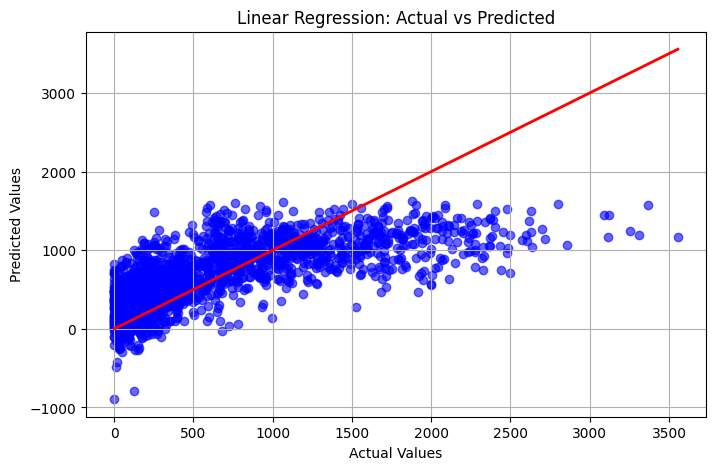

In [51]:
# plot L Regression modal
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # Reference line
plt.grid(True)
plt.show()

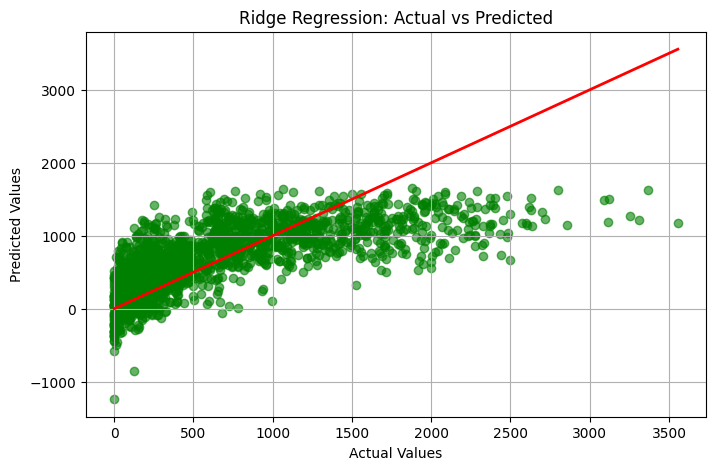

In [52]:
# Plot Ridge Regression
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_ridge, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Ridge Regression: Actual vs Predicted")
plt.grid(True)
plt.show()

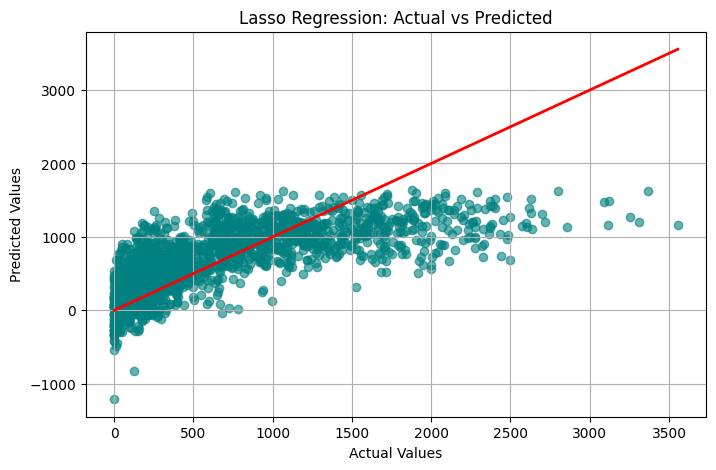

In [53]:
# Plot Lasso Regression
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_lasso, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Lasso Regression: Actual vs Predicted")
plt.grid(True)
plt.show()

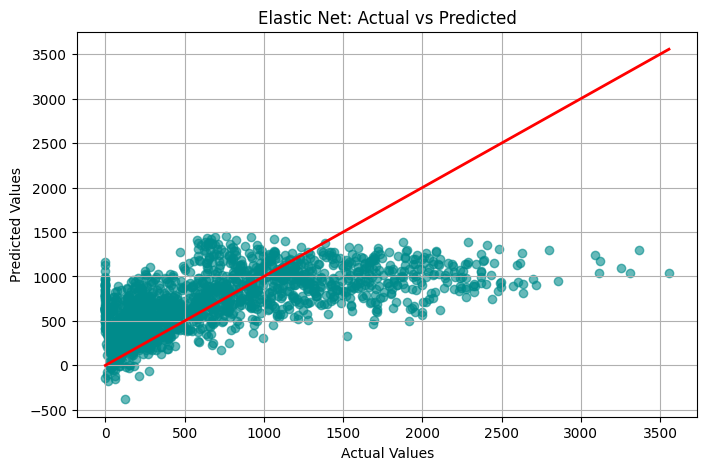

In [54]:
# Plot Elastic Net Regrression
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_enet, alpha=0.6, color='darkcyan')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Elastic Net: Actual vs Predicted")
plt.grid(True)
plt.show()

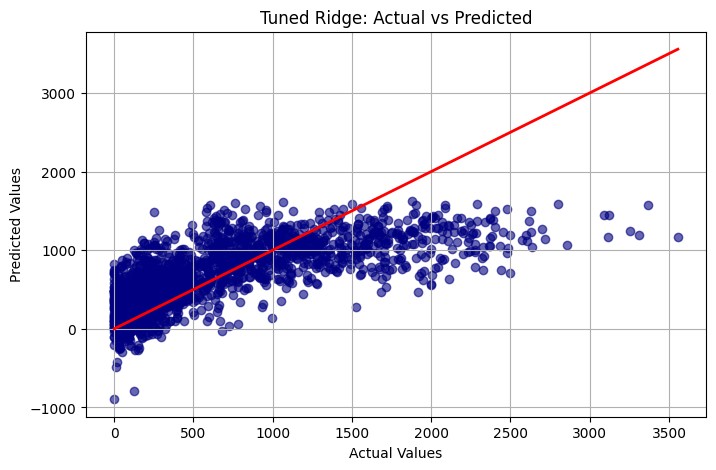

In [55]:
# Plot Perfom hyperparameter tuning using GridSearchCV
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6, color='navy')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Tuned Ridge: Actual vs Predicted")
plt.grid(True)
plt.show()

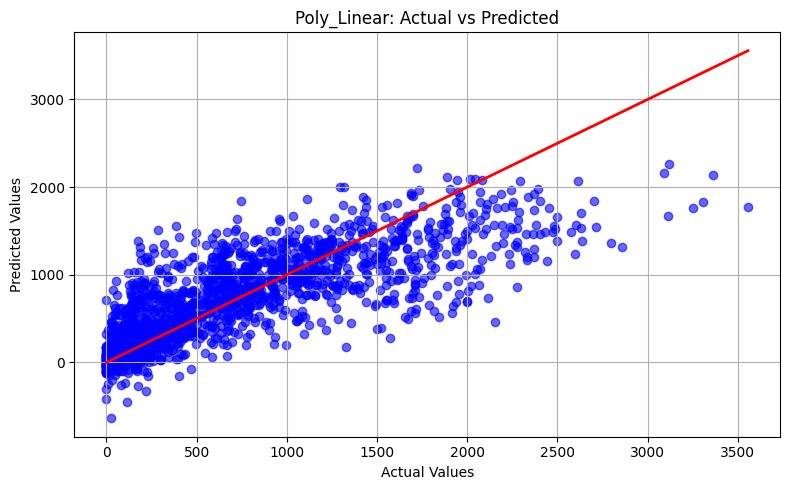

In [56]:
# Plot Poly_Linear
model = poly_models['Poly_Linear']
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Poly_Linear: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

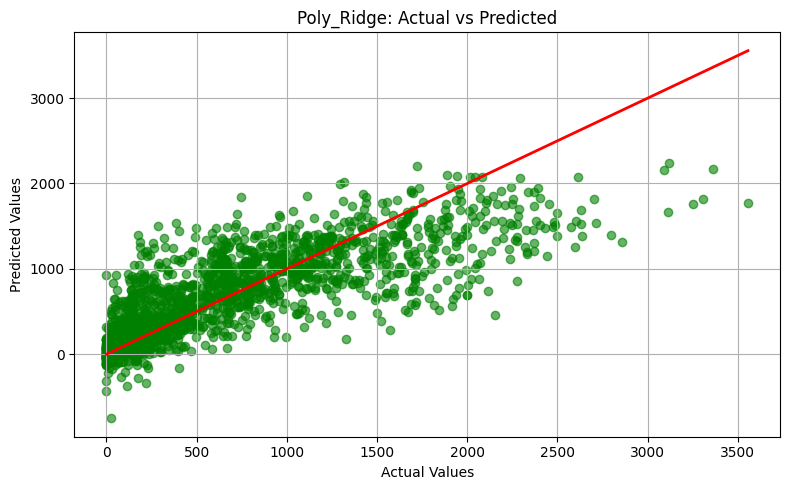

In [57]:
# Plot Poly Ridge
model = poly_models['Poly_Ridge']
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Poly_Ridge: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

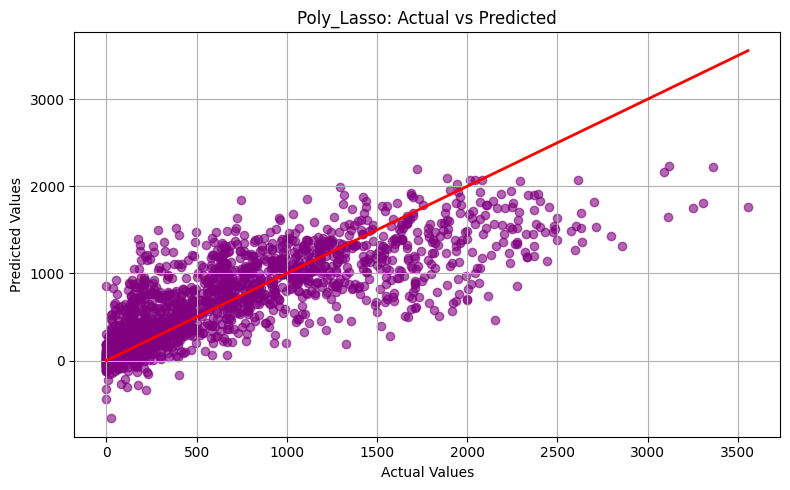

In [58]:
# Plot Poly Lasso
model = poly_models['Poly_Lasso']
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Poly_Lasso: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()